# Decision Tree

In [1]:
library(rpart)

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

In [3]:
data <- read.csv('Cardiotocographic.csv')

In [4]:
head(data)

LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3


In [5]:
dim(data)

[1] 2126   22

In [6]:
is.na(data)

LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [7]:
sum(is.na(data))

[1] 0

In [8]:
str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [9]:
data$NSP <- factor(data$NSP)

In [10]:
str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [11]:
dim(data)

[1] 2126   22

In [12]:
set.seed(1234)
pd <- sample(2,nrow(data),replace = TRUE,prob = c(0.8,0.2))

In [13]:
train <- data[pd==1,]

In [14]:
dim(train)

[1] 1718   22

In [15]:
validate <- data[pd==2,]

In [16]:
dim(validate)

[1] 408  22

In [17]:
install.packages("party")

also installing the dependencies 'modeltools', 'strucchange', 'coin'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\Rtmp48HhAz\downloaded_packages


In [18]:
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [19]:
tree <- ctree(NSP~LB + AC+ FM,data = train)


In [20]:
tree


	 Conditional inference tree with 10 terminal nodes

Response:  NSP 
Inputs:  LB, AC, FM 
Number of observations:  1718 

1) AC <= 0.000834028; criterion = 1, statistic = 263.403
  2) LB <= 136; criterion = 1, statistic = 131.511
    3) FM <= 0.111898; criterion = 1, statistic = 35.729
      4)*  weights = 405 
    3) FM > 0.111898
      5)*  weights = 11 
  2) LB > 136
    6)*  weights = 314 
1) AC > 0.000834028
  7) AC <= 0.002209945; criterion = 1, statistic = 52.155
    8) LB <= 136; criterion = 0.999, statistic = 17.292
      9) FM <= 0.0121396; criterion = 1, statistic = 42.826
        10)*  weights = 103 
      9) FM > 0.0121396
        11)*  weights = 7 
    8) LB > 136
      12)*  weights = 78 
  7) AC > 0.002209945
    13) LB <= 110; criterion = 1, statistic = 18.889
      14)*  weights = 18 
    13) LB > 110
      15) LB <= 147; criterion = 0.965, statistic = 8.877
        16) FM <= 0.2354892; criterion = 0.986, statistic = 10.725
          17)*  weights = 742 
        16) 

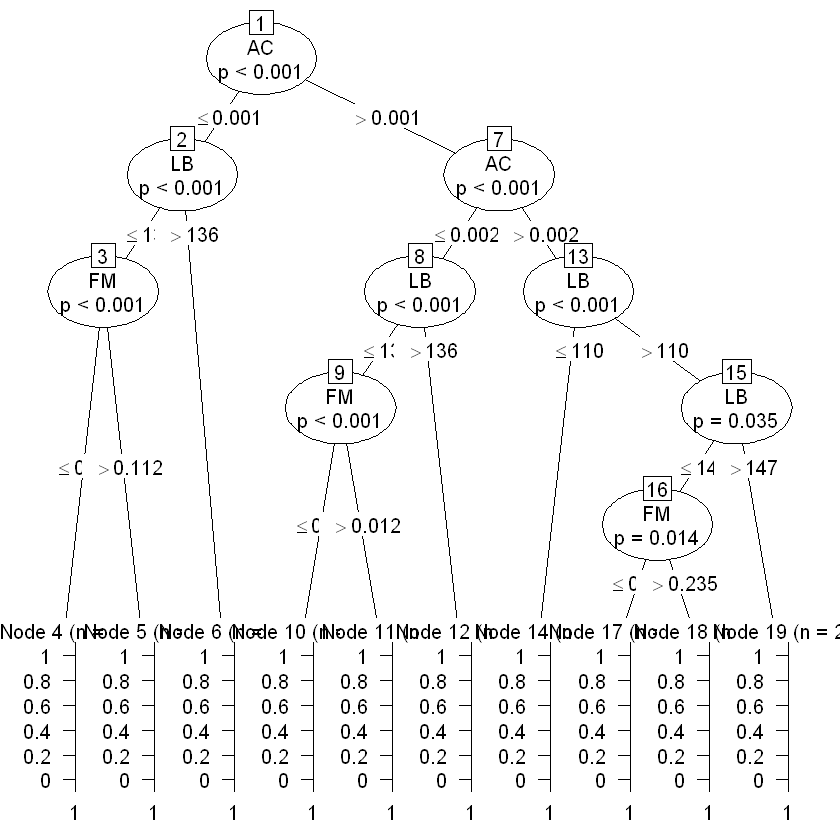

In [21]:
plot(tree)

# Pruning

In [25]:
tress <- ctree(NSP~LB + AC + FM,data = train, controls = ctree_control(mincriterion =0.9,minsplit = 50 ))

In [26]:
tree


	 Conditional inference tree with 10 terminal nodes

Response:  NSP 
Inputs:  LB, AC, FM 
Number of observations:  1718 

1) AC <= 0.000834028; criterion = 1, statistic = 263.403
  2) LB <= 136; criterion = 1, statistic = 131.511
    3) FM <= 0.111898; criterion = 1, statistic = 35.729
      4)*  weights = 405 
    3) FM > 0.111898
      5)*  weights = 11 
  2) LB > 136
    6)*  weights = 314 
1) AC > 0.000834028
  7) AC <= 0.002209945; criterion = 1, statistic = 52.155
    8) LB <= 136; criterion = 0.999, statistic = 17.292
      9) FM <= 0.0121396; criterion = 1, statistic = 42.826
        10)*  weights = 103 
      9) FM > 0.0121396
        11)*  weights = 7 
    8) LB > 136
      12)*  weights = 78 
  7) AC > 0.002209945
    13) LB <= 110; criterion = 1, statistic = 18.889
      14)*  weights = 18 
    13) LB > 110
      15) LB <= 147; criterion = 0.965, statistic = 8.877
        16) FM <= 0.2354892; criterion = 0.986, statistic = 10.725
          17)*  weights = 742 
        16) 

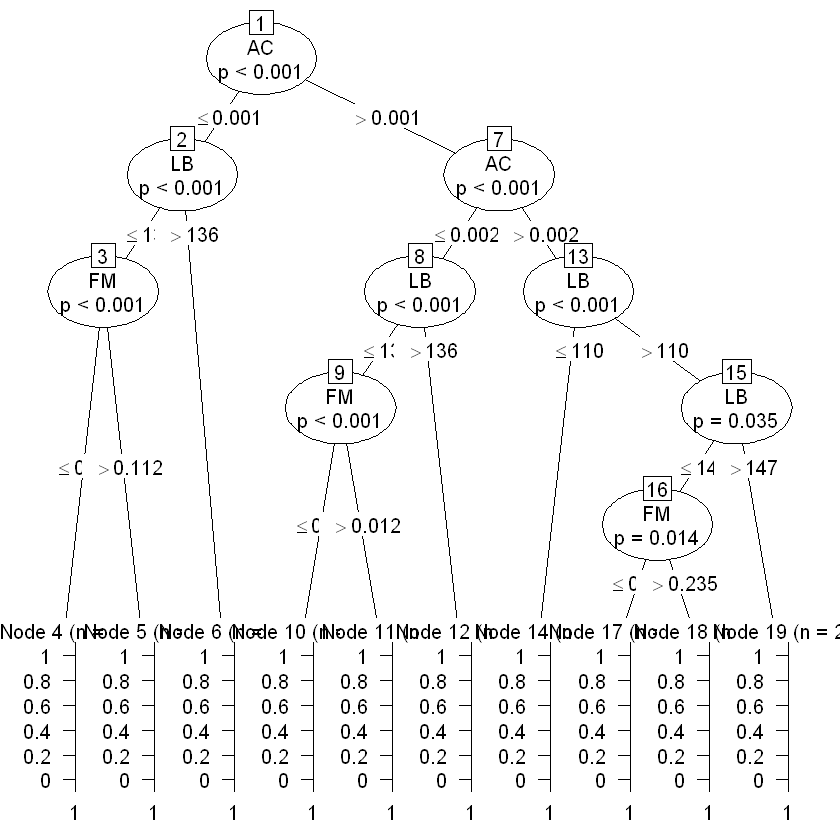

In [27]:
plot(tree)

In [29]:
tress <- ctree(NSP~LB + AC + FM,data = train, controls = ctree_control(mincriterion =0.99,minsplit = 500 ))

In [30]:
tress


	 Conditional inference tree with 5 terminal nodes

Response:  NSP 
Inputs:  LB, AC, FM 
Number of observations:  1718 

1) AC <= 0.000834028; criterion = 1, statistic = 263.403
  2) LB <= 136; criterion = 1, statistic = 131.511
    3)*  weights = 416 
  2) LB > 136
    4)*  weights = 314 
1) AC > 0.000834028
  5) AC <= 0.002209945; criterion = 1, statistic = 52.155
    6)*  weights = 188 
  5) AC > 0.002209945
    7) LB <= 110; criterion = 1, statistic = 18.889
      8)*  weights = 18 
    7) LB > 110
      9)*  weights = 782 

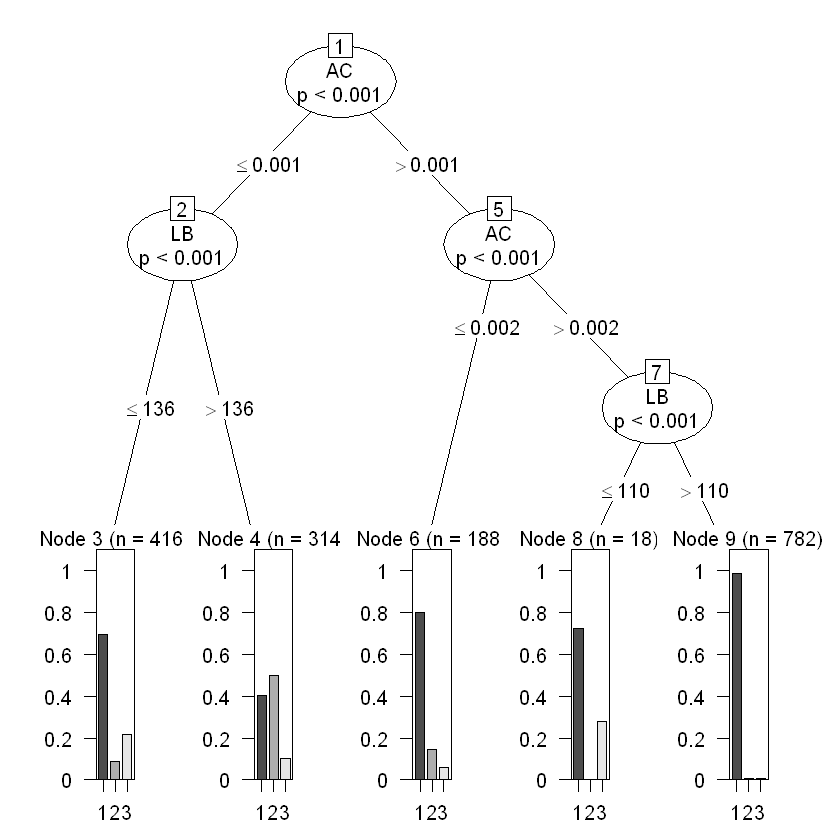

In [31]:
plot(tress)

# Prediction

In [32]:
predict(tress,validate,type="prob")

[[1]]
[1] 0.985933504 0.007672634 0.006393862

[[2]]
[1] 0.985933504 0.007672634 0.006393862

[[3]]
[1] 0.985933504 0.007672634 0.006393862

[[4]]
[1] 0.69230769 0.08894231 0.21875000

[[5]]
[1] 0.69230769 0.08894231 0.21875000

[[6]]
[1] 0.69230769 0.08894231 0.21875000

[[7]]
[1] 0.985933504 0.007672634 0.006393862

[[8]]
[1] 0.985933504 0.007672634 0.006393862

[[9]]
[1] 0.985933504 0.007672634 0.006393862

[[10]]
[1] 0.985933504 0.007672634 0.006393862

[[11]]
[1] 0.985933504 0.007672634 0.006393862

[[12]]
[1] 0.4012739 0.4968153 0.1019108

[[13]]
[1] 0.985933504 0.007672634 0.006393862

[[14]]
[1] 0.79787234 0.14361702 0.05851064

[[15]]
[1] 0.4012739 0.4968153 0.1019108

[[16]]
[1] 0.985933504 0.007672634 0.006393862

[[17]]
[1] 0.69230769 0.08894231 0.21875000

[[18]]
[1] 0.69230769 0.08894231 0.21875000

[[19]]
[1] 0.69230769 0.08894231 0.21875000

[[20]]
[1] 0.69230769 0.08894231 0.21875000

[[21]]
[1] 0.985933504 0.007672634 0.006393862

[[22]]
[1] 0.4012739 0.4968153 0.1019108

[[23]]
[1] 0.79787234 0.14361702 0.05851064

[[24]]
[1] 0.79787234 0.14361702 0.05851064

[[25]]
[1] 0.79787234 0.14361702 0.05851064

[[26]]
[1] 0.985933504 0.007672634 0.006393862

[[27]]
[1] 0.985933504 0.007672634 0.006393862

[[28]]
[1] 0.985933504 0.007672634 0.006393862

[[29]]
[1] 0.79787234 0.14361702 0.05851064

[[30]]
[1] 0.79787234 0.14361702 0.05851064

[[31]]
[1] 0.985933504 0.007672634 0.006393862

[[32]]
[1] 0.985933504 0.007672634 0.006393862

[[33]]
[1] 0.69230769 0.08894231 0.21875000

[[34]]
[1] 0.79787234 0.14361702 0.05851064

[[35]]
[1] 0.79787234 0.14361702 0.05851064

[[36]]
[1] 0.4012739 0.4968153 0.1019108

[[37]]
[1] 0.4012739 0.4968153 0.1019108

[[38]]
[1] 0.4012739 0.4968153 0.1019108

[[39]]
[1] 0.985933504 0.007672634 0.006393862

[[40]]
[1] 0.69230769 0.08894231 0.21875000

[[41]]
[1] 0.985933504 0.007672634 0.006393862

[[42]]
[1] 0.985933504 0.007672634 0.006393862

[[43]]
[1] 0.985933504 0.007672634 0.006393862

[[44]]
[1] 0.69230769 0.08894231 0.21875000

[[45]]
[1] 0.69230769 0.08894231 0.21875000

[[46]]
[1] 0.69230769 0.08894231 0.21875000

[[47]]
[1] 0.985933504 0.007672634 0.006393862

[[48]]
[1] 0.69230769 0.08894231 0.21875000

[[49]]
[1] 0.69230769 0.08894231 0.21875000

[[50]]
[1] 0.79787234 0.14361702 0.05851064

[[51]]
[1] 0.4012739 0.4968153 0.1019108

[[52]]
[1] 0.4012739 0.4968153 0.1019108

[[53]]
[1] 0.4012739 0.4968153 0.1019108

[[54]]
[1] 0.4012739 0.4968153 0.1019108

[[55]]
[1] 0.69230769 0.08894231 0.21875000

[[56]]
[1] 0.4012739 0.4968153 0.1019108

[[57]]
[1] 0.4012739 0.4968153 0.1019108

[[58]]
[1] 0.4012739 0.4968153 0.1019108

[[59]]
[1] 0.4012739 0.4968153 0.1019108

[[60]]
[1] 0.4012739 0.4968153 0.1019108

[[61]]
[1] 0.4012739 0.4968153 0.1019108

[[62]]
[1] 0.4012739 0.4968153 0.1019108

[[63]]
[1] 0.69230769 0.08894231 0.21875000

[[64]]
[1] 0.4012739 0.4968153 0.1019108

[[65]]
[1] 0.4012739 0.4968153 0.1019108

[[66]]
[1] 0.4012739 0.4968153 0.1019108

[[67]]
[1] 0.4012739 0.4968153 0.1019108

[[68]]
[1] 0.69230769 0.08894231 0.21875000

[[69]]
[1] 0.69230769 0.08894231 0.21875000

[[70]]
[1] 0.69230769 0.08894231 0.21875000

[[71]]
[1] 0.4012739 0.4968153 0.1019108

[[72]]
[1] 0.4012739 0.4968153 0.1019108

[[73]]
[1] 0.985933504 0.007672634 0.006393862

[[74]]
[1] 0.985933504 0.007672634 0.006393862

[[75]]
[1] 0.4012739 0.4968153 0.1019108

[[76]]
[1] 0.4012739 0.4968153 0.1019108

[[77]]
[1] 0.4012739 0.4968153 0.1019108

[[78]]
[1] 0.79787234 0.14361702 0.05851064

[[79]]
[1] 0.4012739 0.4968153 0.1019108

[[80]]
[1] 0.4012739 0.4968153 0.1019108

[[81]]
[1] 0.985933504 0.007672634 0.006393862

[[82]]
[1] 0.4012739 0.4968153 0.1019108

[[83]]
[1] 0.4012739 0.4968153 0.1019108

[[84]]
[1] 0.79787234 0.14361702 0.05851064

[[85]]
[1] 0.4012739 0.4968153 0.1019108

[[86]]
[1] 0.4012739 0.4968153 0.1019108

[[87]]
[1] 0.985933504 0.007672634 0.006393862

[[88]]
[1] 0.69230769 0.08894231 0.21875000

[[89]]
[1] 0.69230769 0.08894231 0.21875000

[[90]]
[1] 0.4012739 0.49

In [33]:
predict(tress,validate)

[1] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 [38] 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 1 1
 [75] 2 2 2 1 2 2 1 2 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1
[149] 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 1 2 2 1 1 1 1 1
[186] 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2
[297] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2
[371] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
[408] 2
Levels: 1 2 3

In [34]:
library(rpart)

In [35]:
tree1 <- rpart(NSP~LB + AC+ FM,train)

In [36]:
library(rpart.plot)

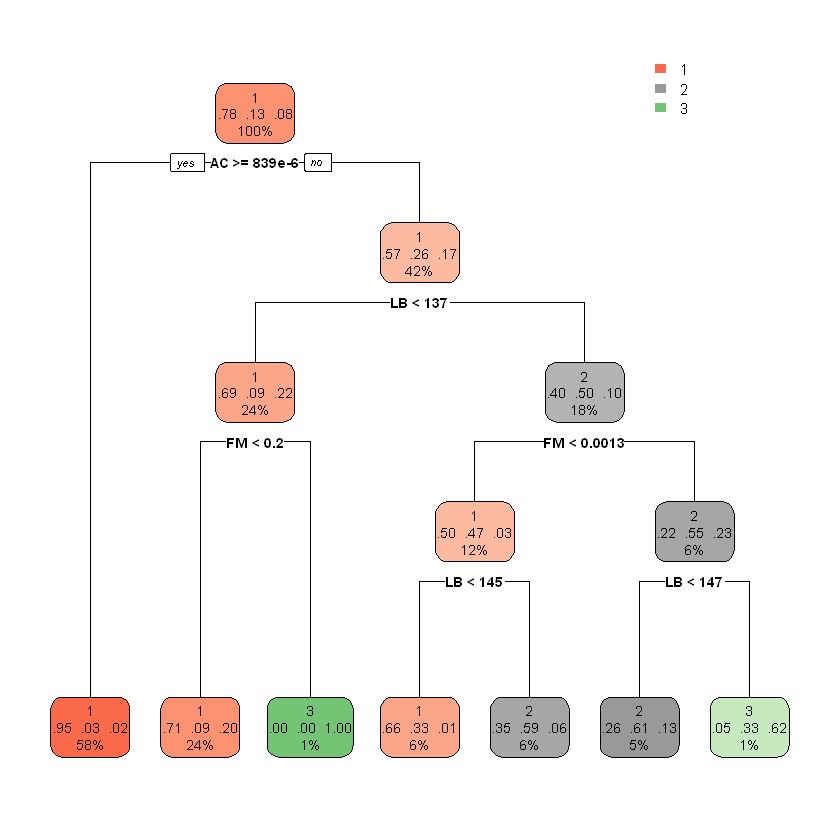

In [37]:
rpart.plot(tree1)

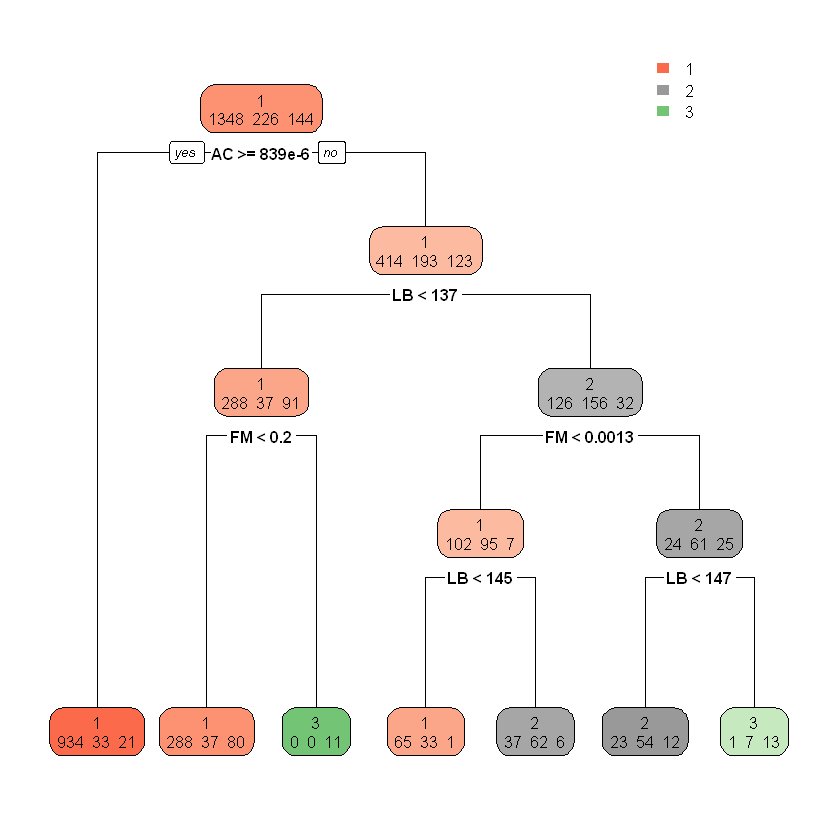

In [38]:
rpart.plot(tree1,extra =1)

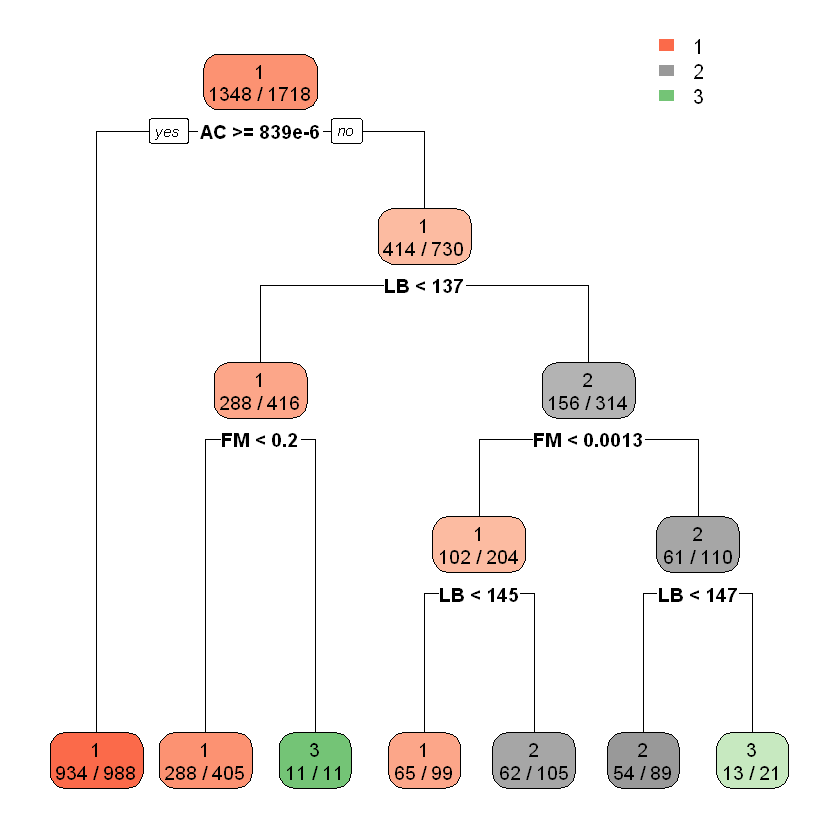

In [39]:
rpart.plot(tree1,extra = 2)

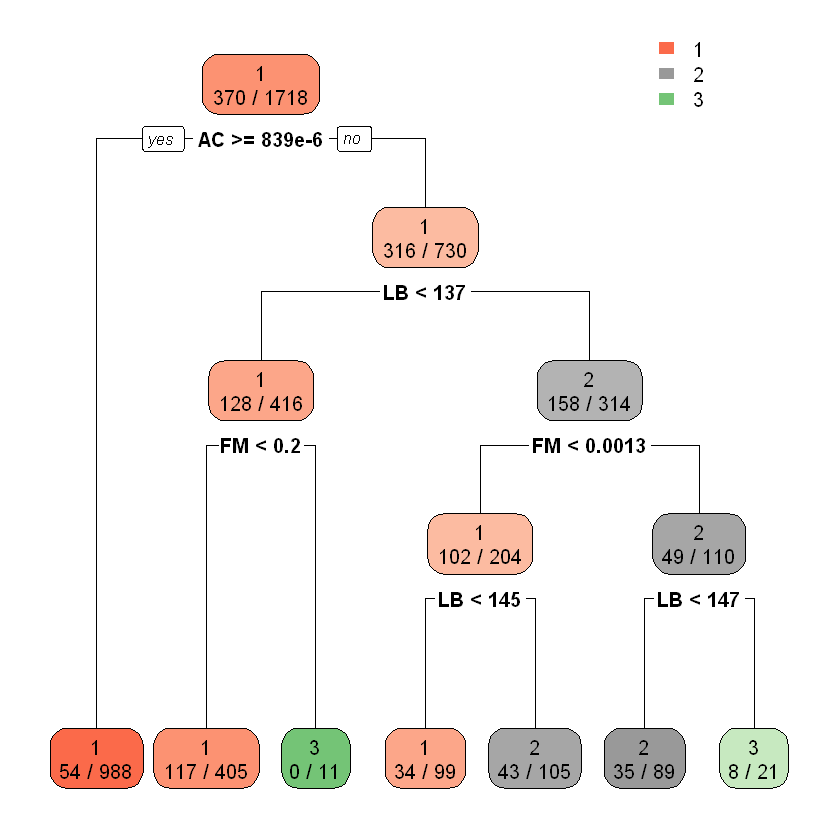

In [40]:
rpart.plot(tree1,extra = 3)

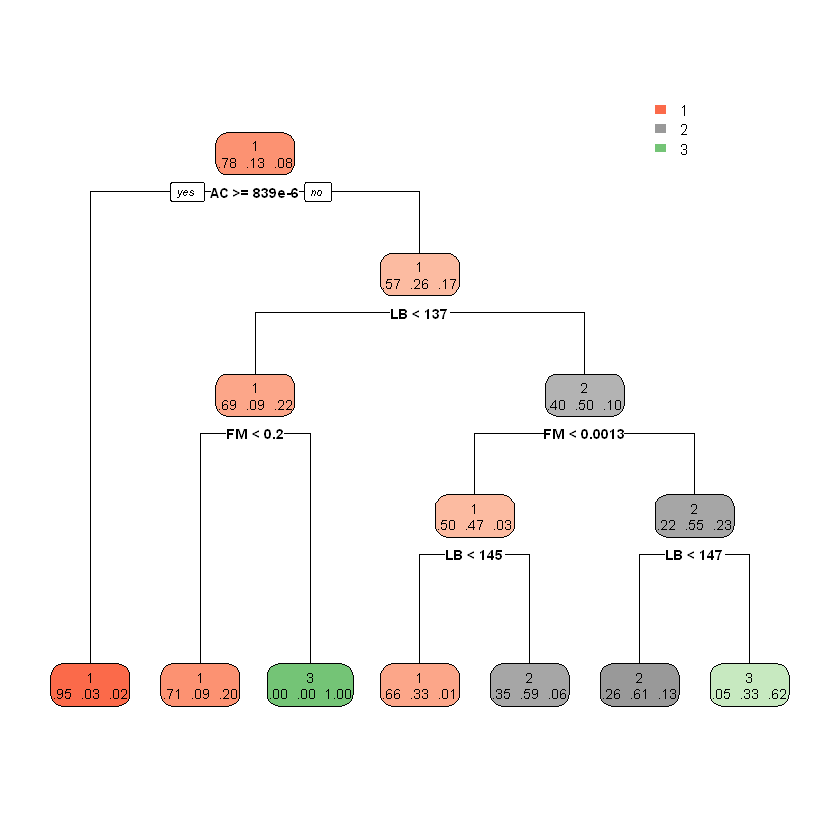

In [41]:
rpart.plot(tree1,extra = 4)

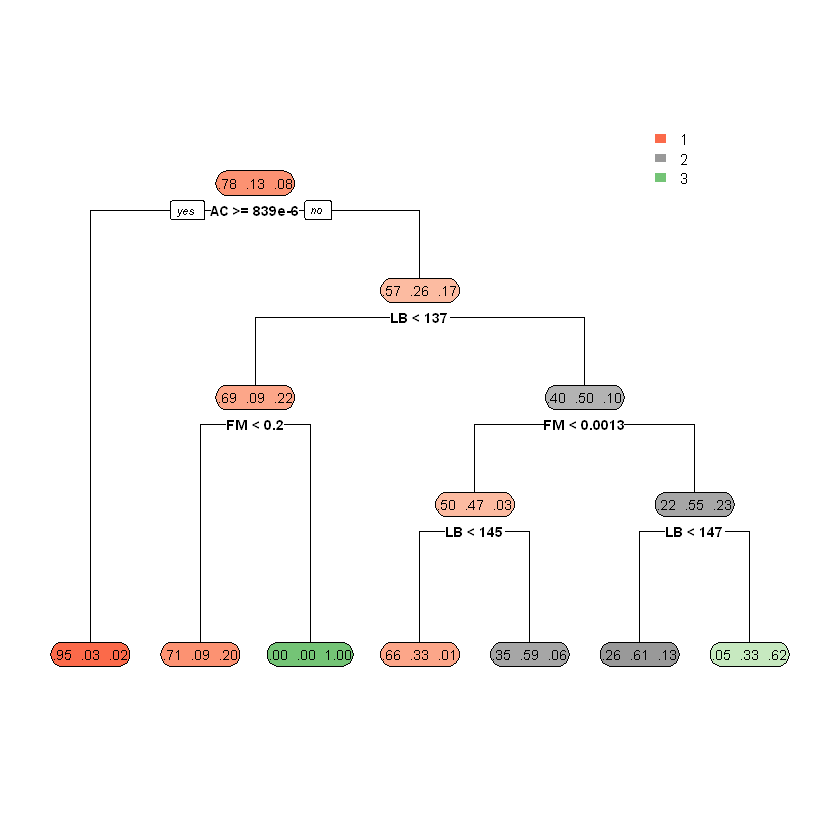

In [42]:
rpart.plot(tree1,extra = 5)

In [43]:
predict(tree1,validate)

,1,2,3
5,0.9453441,0.03340081,0.02125506
14,0.9453441,0.03340081,0.02125506
16,0.9453441,0.03340081,0.02125506
26,0.7111111,0.09135802,0.19753086
28,0.7111111,0.09135802,0.19753086
29,0.7111111,0.09135802,0.19753086
39,0.9453441,0.03340081,0.02125506
40,0.9453441,0.03340081,0.02125506
60,0.9453441,0.03340081,0.02125506
61,0.9453441,0.03340081,0.02125506


# Mis-Classification Error

In [44]:
tab <- table(predict(tree),train$NSP)
print(tab)

   
       1    2    3
  1 1222   70  101
  2  126  156   32
  3    0    0   11


In [45]:
1 - sum(diag(tab))/sum(tab)

[1] 0.1915017

In [46]:
testpred <- predict(tree,newdata = validate)


In [47]:
tab <- table(testpred,validate$NSP)

In [48]:
tab

        
testpred   1   2   3
       1 274  20  27
       2  33  48   4
       3   0   1   1

In [49]:
1 - sum(diag(tab))/sum(tab)

[1] 0.2083333